#### Import Library

In [484]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # setting seaborn default for plots
pd.options.display.float_format = '${:,.2f}'.format

#### Import Train Dataset

In [485]:
ds_train = pd.read_csv('train.csv')
ds_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,$22.00,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,$38.00,1,0,PC 17599,$71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,$26.00,0,0,STON/O2. 3101282,$7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,$35.00,1,0,113803,$53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,$35.00,0,0,373450,$8.05,NaN,S


#### Check Null Data

In [486]:
ds_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Check Type of Data

In [487]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## The Number of Passenger

####  The number of passengers based on sex

Total Male Passanger  577
Total Female Passanger  314


Text(0, 0.5, 'Total Passanger')

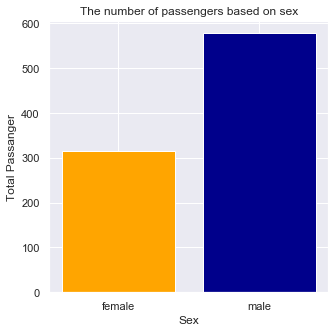

In [488]:
pass_sex=ds_train[['PassengerId','Sex']].groupby(['Sex']).count().reset_index()
print("Total Male Passanger ",(pass_sex[pass_sex['Sex']=='male']).PassengerId.sum())
print("Total Female Passanger ",(pass_sex[pass_sex['Sex']=='female']).PassengerId.sum())

fig, ay = plt.subplots(figsize=(5, 5))
ay.bar(pass_sex['Sex'], pass_sex['PassengerId'], color=['orange', 'darkBlue'])

ay.set_title('The number of passengers based on sex')
ay.set_xlabel('Sex')
ay.set_ylabel('Total Passanger')

#### The number of passengers based on Embarked

Text(0, 0.5, 'Total Passanger')

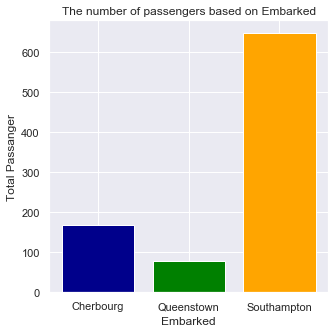

In [489]:
def embarked (em) :
    if em =='C':
        return 'Cherbourg'
    elif em == 'Q' :
        return 'Queenstown'
    else :
        return 'Southampton'
    
ds_train['Embarked'] =ds_train.Embarked.apply(embarked)
pass_embarked = ds_train.copy()
pass_embarked=ds_train[['PassengerId','Embarked']].groupby(['Embarked']).count().reset_index()

fig, ay = plt.subplots(figsize=(5, 5))
ay.bar(pass_embarked['Embarked'], pass_embarked['PassengerId'], color=['DarkBlue', 'Green', 'orange'])
ay.set_title('The number of passengers based on Embarked')
ay.set_xlabel('Embarked')
ay.set_ylabel('Total Passanger')


In [490]:
pass_embarked

,Embarked,PassengerId
0,Cherbourg,168
1,Queenstown,77
2,Southampton,646


#### The number of passengers sailing alone and with family

Text(0, 0.5, 'Total Passanger')

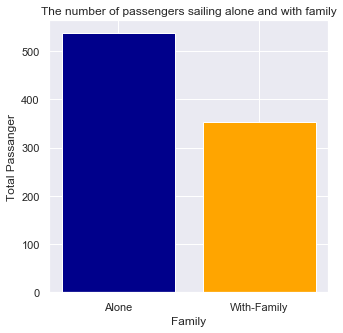

In [491]:
pass_family = ds_train.copy()
pass_family['Family'] = pass_family['SibSp']+pass_family['Parch']
pass_family['Family']  = np.where(pass_family['Family'] == 0, 'Alone', 'With-Family')

pass_family = pass_family[['PassengerId','Family']].groupby(['Family']).count().reset_index()

fig, ay = plt.subplots(figsize=(5,5))
ay.bar(pass_family ['Family'], pass_family['PassengerId'], color=['DarkBlue', 'Orange'])

ay.set_title('The number of passengers sailing alone and with family')
ay.set_xlabel('Family')
ay.set_ylabel('Total Passanger')

In [492]:
pass_family

,Family,PassengerId
0,Alone,537
1,With-Family,354


#### The number of passengers based on age classification

Text(0, 0.5, 'Total Passanger')

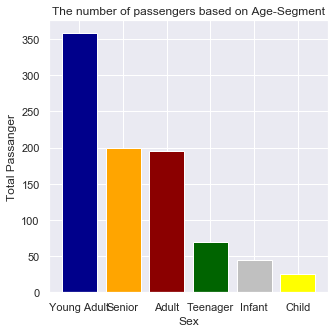

In [493]:
def age_segment (age) :
    if age >=0 and age <=5 :
        return 'Infant'
    elif age >5 and age <=12 :
        return 'Child'
    elif age >12 and age <=18 :
        return 'Teenager'
    elif age >18 and age <=35 :
        return 'Young Adult'    
    elif age >35 and age <=60 :
        return 'Adult'  
    else  :
        return 'Senior'


ds_train['Age-Segment'] = ds_train['Age'].apply(age_segment)
pass_age = ds_train[['PassengerId','Age-Segment']].groupby(['Age-Segment']).count().reset_index().sort_values('PassengerId', ascending=False)

fig, ay = plt.subplots(figsize=(5, 5))
ay.bar(pass_age ['Age-Segment'], pass_age['PassengerId'], color=['DarkBlue', 'Orange', 'darkred', 'darkgreen', 'silver', 'yellow'])
ay.set_title('The number of passengers based on Age-Segment')
ay.set_xlabel('Sex')
ay.set_ylabel('Total Passanger')

In [494]:
pass_age

,Age-Segment,PassengerId
5,Young Adult,358
3,Senior,199
0,Adult,195
4,Teenager,70
2,Infant,44
1,Child,25


## The Number of Died and Survived Passenger

#### Of all passengers , how many survived, how many died ?

61.62% of total passenger canot survive from accident
And only 38.38% survived from accident


Text(0, 0.5, 'Total Passanger')

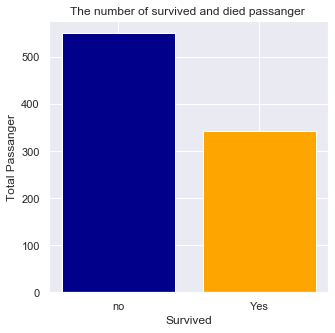

In [495]:

ds_survived = ds_train[['Survived', 'PassengerId']].groupby('Survived').count().reset_index()
ds_survived['Survived']= np.where(ds_survived['Survived']== 0, 'no', 'Yes')

survived = ds_train[ds_train['Survived']==1]
rate_survived = survived[['Survived', 'PassengerId']].groupby('Survived').count().reset_index()/ds_train['PassengerId'].count()
not_survived = ds_train[ds_train['Survived']==0]
rate_not_survived = not_survived[['Survived', 'PassengerId']].groupby('Survived').count().reset_index()/ds_train['PassengerId'].count()
print(("{0:.2f}%".format((rate_not_survived['PassengerId'].sum()*100))),"of total passenger canot survive from accident")
print("And only", ("{0:.2f}%".format((rate_survived['PassengerId'].sum()*100))), "survived from accident")


fig, ay = plt.subplots(figsize=(5, 5))
ay.bar(ds_survived['Survived'], ds_survived['PassengerId'], color=['DarkBlue', 'Orange'])
ay.set_title('The number of survived and died passanger ')
ay.set_xlabel('Survived')
ay.set_ylabel('Total Passanger')


### Of all passengers , how many male/female survived or died ?

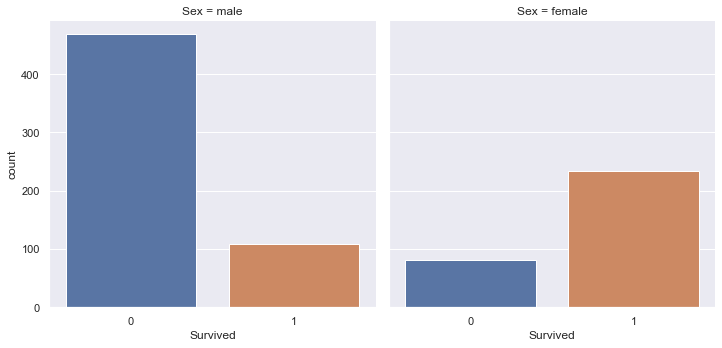

In [496]:
sns.catplot(x='Survived',col='Sex',kind='count', data=ds_train)

In [497]:
ds_train[['PassengerId','Survived','Sex']].groupby(['Survived','Sex']).count().reset_index()

,Survived,Sex,PassengerId
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


#### Gender comparison with embarked  who did not survive

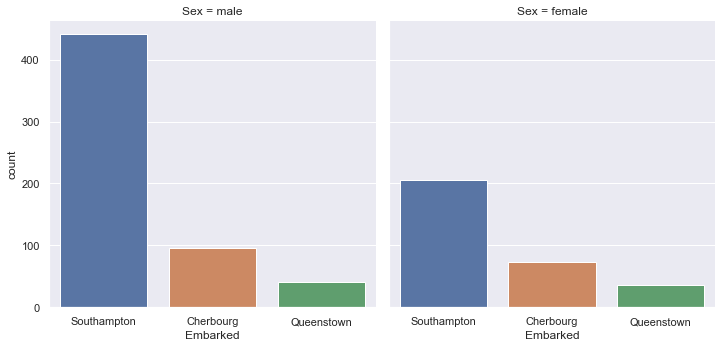

In [498]:
ds_embarked = ds_train[ds_train['Survived'] ==0]
sns.catplot(x='Embarked',col='Sex',kind='count', data=ds_train)

In [499]:
ds_embarked[['PassengerId','Embarked','Sex']].groupby(['Embarked','Sex']).count().reset_index()

,Embarked,Sex,PassengerId
0,Cherbourg,female,9
1,Cherbourg,male,66
2,Queenstown,female,9
3,Queenstown,male,38
4,Southampton,female,63
5,Southampton,male,364


#### gender comparison with age-segment that does not survive

,Age-Segment,Sex,PassengerId
0,Adult,female,16
1,Adult,male,101
2,Child,female,8
3,Child,male,8
4,Infant,female,5
5,Infant,male,8
6,Senior,female,17
7,Senior,male,125
8,Teenager,female,9
9,Teenager,male,31


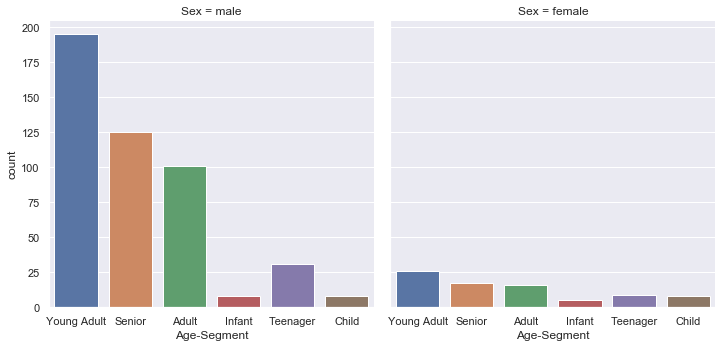

In [500]:
ds_train = ds_train[ds_train['Survived'] ==0]
sns.catplot(x='Age-Segment',col='Sex',kind='count', data=ds_train)
ds_train[['PassengerId','Age-Segment','Sex']].groupby(['Age-Segment','Sex']).count().reset_index()